<a href="https://colab.research.google.com/github/IslamTayeb/life-edit-gene-classifier/blob/main/data/elbowClusters/geneProcessor_5000genes_9_Clusters_1_6_250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gene Processor for 9 Clusters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
raw_annotation = pd.read_csv("../../../data/Human.GRCh38.p13.annot.tsv", sep = '\t')
raw_annotation

C:\Users\mzora\AppData\Local\Temp\ipykernel_33268\369036968.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv("../../../data/Human.GRCh38.p13.annot.tsv", sep = '\t')


,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd

# Step 2: Read the relevantGenes3.txt file
# Assuming relevantGenes3.txt contains genes separated by commas
with open('../../../data/5000 Gene Combinations/relevant_genes_1.6_250.txt', 'r') as file:
    relevant_genes = file.read().strip().split(',')

# Step 3: Clean up the data
# Ensure 'GeneID' column is treated as a string (important if GeneID might not always be numeric)
raw_annotation['GeneID'] = raw_annotation['GeneID'].astype(str).str.strip()
relevant_genes = [gene.strip() for gene in relevant_genes]

# Step 4: Filter the raw_annotation table
filtered_data = raw_annotation[raw_annotation['GeneID'].isin(relevant_genes)]

# Step 5: Save or display the filtered data
filtered_data.to_csv('../../../data/localData/filtered_genes.csv', index=False)

filtered_data.head()

,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
18,113219467,MIR12136,microRNA 12136,NaN,ncRNA,NaN,active,NC_000001.11,632615,632685,negative,71,GO:0030533,GO:0006412,NaN,triplet codon-amino acid adaptor activity,translation,NaN
39,57801,HES4,hes family bHLH transcription factor 4,bHLHb42,protein-coding,ENSG00000188290,active,NC_000001.11,998962,1001052,negative,1920,GO:0000978///GO:0000981///GO:0005515///GO:0046983,GO:0006357///GO:0007399///GO:0009952///GO:0030154,GO:0000785///GO:0005634,RNA polymerase II cis-regulatory region sequen...,regulation of transcription by RNA polymerase ...,chromatin///nucleus
40,9636,ISG15,ISG15 ubiquitin like modifier,G1P2|IFI15|IMD38|IP17|UCRP|hUCRP,protein-coding,ENSG00000187608,active,NC_000001.11,1013497,1014540,positive,637,GO:0003735///GO:0005178///GO:0005515///GO:0031...,GO:0007229///GO:0009615///GO:0016567///GO:0019...,GO:0005576///GO:0005634///GO:0005654///GO:0005...,structural constituent of ribosome///integrin ...,integrin-mediated signaling pathway///response...,extracellular region///nucleus///nucleoplasm//...
42,100288175,LOC100288175,uncharacterized LOC100288175,NaN,ncRNA,ENSG00000291156,active,NC_000001.11,1059734,1066453,positive,974,NaN,NaN,NaN,NaN,NaN,NaN
62,102465434,MIR6726,microRNA 6726,hsa-mir-6726,ncRNA,ENSG00000278073,active,NC_000001.11,1296110,1296170,negative,61,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**


In [9]:
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = filtered_data

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and tokenize descriptions
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    # Keep only alphanumeric characters and underscores
    text = re.sub(r'[^a-zA-Z0-9_ ]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
df['cleaned_description'] = df['Description'].apply(clean_text)
print(df[['Description', 'cleaned_description']].head(10))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mzora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mzora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mzora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mzora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                Description  \
18                           microRNA 12136   
39   hes family bHLH transcription factor 4   
40            ISG15 ubiquitin like modifier   
42             uncharacterized LOC100288175   
62                            microRNA 6726   
63         small nucleolar RNA, C/D box 167   
91              matrix metallopeptidase 23B   
104            uncharacterized LOC107984872   
132            uncharacterized LOC112268220   
150                                     NaN   

                       cleaned_description  
18                          microrna 12136  
39   he family bhlh transcription factor 4  
40           isg15 ubiquitin like modifier  
42            uncharacterized loc100288175  
62                           microrna 6726  
63           small nucleolar rna c box 167  
91             matrix metallopeptidase 23b  
104           uncharacterized loc107984872  
132           uncharacterized loc112268220  
150                             

C:\Users\mzora\AppData\Local\Temp\ipykernel_33268\3855302541.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_description'] = df['Description'].apply(clean_text)


# **Feature Extraction**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# **Elbow Testing**

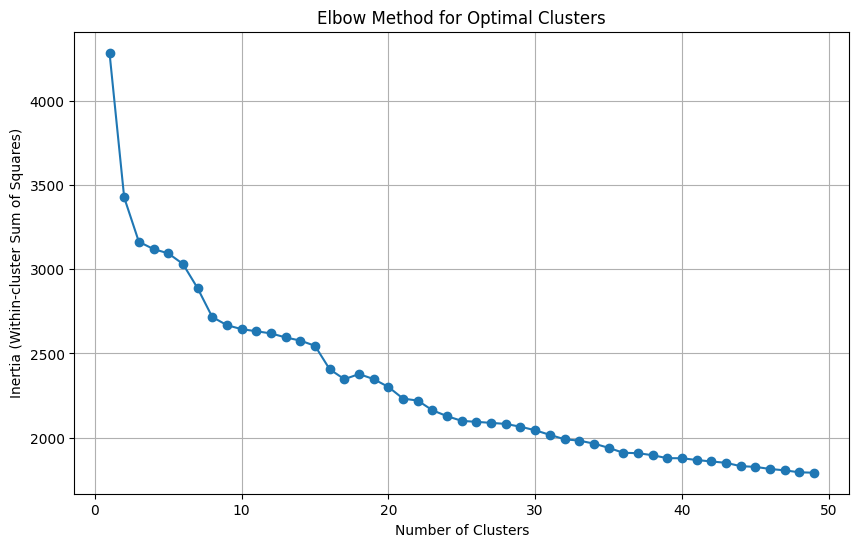

Optimal number of clusters explaining at least 80.0% variance: 1


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Set a range for possible cluster numbers
range_n_clusters = range(1, 50)  # Test from 1 to 20 clusters

# Calculate the inertia (within-cluster sum of squares) for each k
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Select the number of clusters explaining at least x% of the variance
variance_explained = 1 - np.array(inertia) / max(inertia)
x_percent_threshold = 0.80  # Adjust this value to your desired threshold (e.g., 90%)
optimal_clusters = np.argmax(variance_explained >= x_percent_threshold) + 1  # +1 because range_n_clusters starts at 1

print(f"Optimal number of clusters explaining at least {x_percent_threshold * 100}% variance: {optimal_clusters}")


## **Ideal Elbow at:** *Approximately 9 Clusters*

# **K-Means Clustering**

In [12]:
from sklearn.cluster import KMeans

# Set number of clusters to around 50
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)  # or embedding_matrix if using embeddings

# Assign cluster labels to the dataframe
df['cluster'] = clusters

C:\Users\mzora\AppData\Local\Temp\ipykernel_33268\1120993839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


In [13]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['Description'].head(100))  # Display 50 samples per cluster

Cluster 0:
63      small nucleolar RNA, C/D box 167
91           matrix metallopeptidase 23B
236                     MIR34A host gene
298             RNA, U5E small nuclear 1
349                           podoplanin
                      ...               
1986    RNA, variant U1 small nuclear 18
2036        tRNA-Asn (anticodon GTT) 2-7
2046             ring finger protein 115
2048                  nudix hydrolase 17
2063        tRNA-Glu (anticodon CTC) 1-1
Name: Description, Length: 100, dtype: object
Cluster 1:
42      uncharacterized LOC100288175
104     uncharacterized LOC107984872
132     uncharacterized LOC112268220
213     uncharacterized LOC105376691
279     uncharacterized LOC105376737
                    ...             
3883    uncharacterized LOC107985843
3891    uncharacterized LOC105373401
3900    uncharacterized LOC105373404
3914    uncharacterized LOC105373408
3929    uncharacterized LOC105373415
Name: Description, Length: 100, dtype: object
Cluster 2:
168     long inte

Export Full-Amount of 100 Entries

In [14]:
# Loop through clusters and save each cluster's data as a separate CSV file
for i in range(num_clusters):
    cluster_data = df[df['cluster'] == i]['Description'].head(500)  # Adjust the head() if needed
    cluster_data.to_csv(f'../../../data/localData/clusterData/cluster_{i}_output.csv', index=False, header=True)


**Cluster Information:**
View Cluster Science for Each Naming Here: https://github.com/IslamTayeb/life-edit-gene-classifier/tree/main/data/elbowClusters/clusterScience

0. Divergent Pseudogene-Enriched Immunoglobulin and Transcriptomic Regulatory Cluster
1. Integrative Gene Cluster for Signaling, Transport, and Stress Response
2. Non-readable (NAN Entries)
3. Integrative Regulators of Transcriptional, Translational, and Signal Modulation Pathways (IR-TTSMP)
4. Uncharacterized Genetic Elements with Potential Roles in Genomic Regulation and Evolutionary Adaptation (UGE-GREA)
5. Dynamic Structural Interaction and Regulatory Domain Cluster (DSIRDC)
6. Chromosomal Open Reading Frame (CORF) Cluster
7. Long Intergenic Non-Coding and Antisense RNA Regulatory Gene Network Cluster
8. Multifunctional Regulatory RNA and Extracellular Dynamics Hub (MRRED-Hub)




# **Supervised Model for Classification**

In [15]:
# Assign more descriptive and detailed labels to each cluster
df['function_label'] = None  # Initialize a new column for functional labels

# Assign labels for each cluster
df.loc[df['cluster'] == 0, 'function_label'] = 'Divergent Pseudogene-Enriched Immunoglobulin and Transcriptomic Regulatory Cluster'
df.loc[df['cluster'] == 1, 'function_label'] = 'Integrative Gene Cluster for Signaling, Transport, and Stress Response'
df.loc[df['cluster'] == 2, 'function_label'] = 'Non-readable Gene Entries (NAN Entries)'
df.loc[df['cluster'] == 3, 'function_label'] = 'Integrative Regulators of Transcriptional, Translational, and Signal Modulation Pathways (IR-TTSMP)'
df.loc[df['cluster'] == 4, 'function_label'] = 'Uncharacterized Genetic Elements with Potential Roles in Genomic Regulation and Evolutionary Adaptation (UGE-GREA)'
df.loc[df['cluster'] == 5, 'function_label'] = 'Dynamic Structural Interaction and Regulatory Domain Cluster (DSIRDC)'
df.loc[df['cluster'] == 6, 'function_label'] = 'Chromosomal Open Reading Frame (CORF) Cluster'
df.loc[df['cluster'] == 7, 'function_label'] = 'Long Intergenic Non-Coding and Antisense RNA Regulatory Gene Network Cluster'
df.loc[df['cluster'] == 8, 'function_label'] = 'Multifunctional Regulatory RNA and Extracellular Dynamics Hub (MRRED-Hub)'

# Check if the labels have been assigned correctly
print(df[['cluster', 'Description', 'function_label']].head(20))


     cluster                                  Description  \
18         6                               microRNA 12136   
39         3       hes family bHLH transcription factor 4   
40         8                ISG15 ubiquitin like modifier   
42         1                 uncharacterized LOC100288175   
62         6                                microRNA 6726   
63         0             small nucleolar RNA, C/D box 167   
91         0                  matrix metallopeptidase 23B   
104        1                 uncharacterized LOC107984872   
132        1                 uncharacterized LOC112268220   
150        4                                          NaN   
168        2  long intergenic non-protein coding RNA 1777   
213        1                 uncharacterized LOC105376691   
233        3             solute carrier family 2 member 7   
236        0                             MIR34A host gene   
279        1                 uncharacterized LOC105376737   
280        1            

C:\Users\mzora\AppData\Local\Temp\ipykernel_33268\642906597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['function_label'] = None  # Initialize a new column for functional labels


### You must install SentenceTransformer
```
%pip install sentence_transfomers
```

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the BERT model for generating embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Use an appropriate pre-trained model

# Generate embeddings for the cleaned descriptions
embeddings = model.encode(df['cleaned_description'].tolist())

# Convert the embeddings into a DataFrame for easier handling
embedding_df = pd.DataFrame(embeddings)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Filter out rows that don't have labels for training
labeled_data = df.dropna(subset=['function_label'])

# Use the BERT embeddings for the labeled data as features (X)
X = embedding_df.loc[filtered_data.index]
y = labeled_data['function_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Check for mismatched indices
missing_indices = set(labeled_data.index) - set(embedding_df.index)
print(f"Missing Indices in embedding_df: {missing_indices}")
print(f"Number of Missing Indices: {len(missing_indices)}")

# Drop the rows in labeled_data that do not have corresponding embeddings
labeled_data = labeled_data.loc[~labeled_data.index.isin(missing_indices)]
print("Updated Labeled Data Shape (after removing missing indices):", labeled_data.shape)

# Verify if indices now match
print("Do indices in embedding_df cover updated labeled_data?",
      set(labeled_data.index).issubset(set(embedding_df.index)))

# Proceed with feature and label selection
X = embedding_df.loc[labeled_data.index]
y = labeled_data['function_label']
print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

# Train the classifier and evaluate
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


# **(OPTIONAL) Hyperparameter Tuning**

Grid-search Takes Over 6 Hours, use Random Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Re-train the classifier with the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the hyperparameter grid with ranges for Randomized Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=5)],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model using Randomized Search
random_search.fit(X_train, y_train)

# Retrieve the best parameters and train the final model
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train a new RandomForestClassifier using the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


# **Classify Unlabeled Data**

In [28]:
# Filter out the unlabeled data
unlabeled_data = df[df['function_label'].isna()]

# Check if there are any unlabeled samples
if len(unlabeled_data) == 0:
    print("No unlabeled data found. All data points are labeled.")
else:
    # Use the BERT embeddings for the unlabeled data
    X_unlabeled = embedding_df.loc[unlabeled_data.index]

    # Predict the labels for the unlabeled data
    predicted_labels = clf.predict(X_unlabeled)

    # Assign the predicted labels to the original DataFrame
    df.loc[unlabeled_data.index, 'function_label'] = predicted_labels

    # View some of the newly labeled data
    print(df[['Description', 'function_label']].tail(20))


No unlabeled data found. All data points are labeled.


# **Model Finalization**
To download the Random Forest Classifier: [Drive Link](https://drive.google.com/file/d/15ppZiqDKj1BrsCZVRQLFgrT1Jebo9D9V/view?usp=sharing )

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(clf, '../../../data/localData/classifierPKL/random_forest_gene_classifier_9Clusters_16_250.pkl')

# To load the model later, you can use:
# clf = joblib.load('random_forest_gene_classifier.pkl')

In [32]:
# Save the DataFrame to a CSV file
df.to_csv('../../../data/localData/testData/random_forest_gene_classifier_9Clusters_16_250.csv', index=False)

### Plotting the Functional Groups on Basis of Elbow Cluster Report

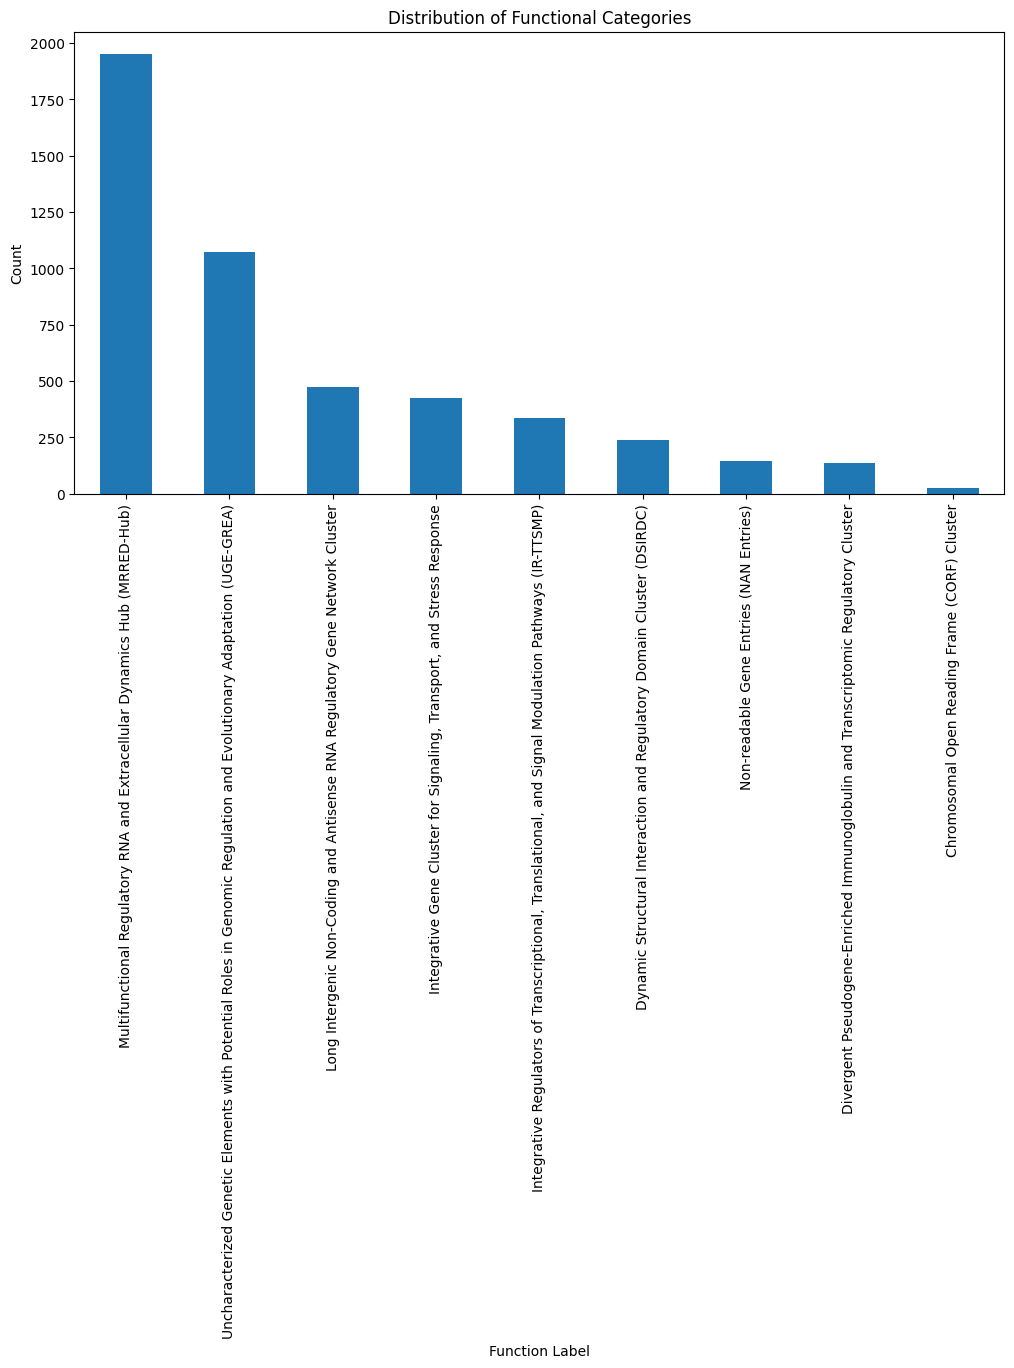

In [33]:
import matplotlib.pyplot as plt

# Plot the distribution of functional categories
label_counts = df['function_label'].value_counts()
label_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Functional Categories')
plt.xlabel('Function Label')
plt.ylabel('Count')
plt.show()